# Learning to Read with Sklearn: The MNIST Handwriting Dataset

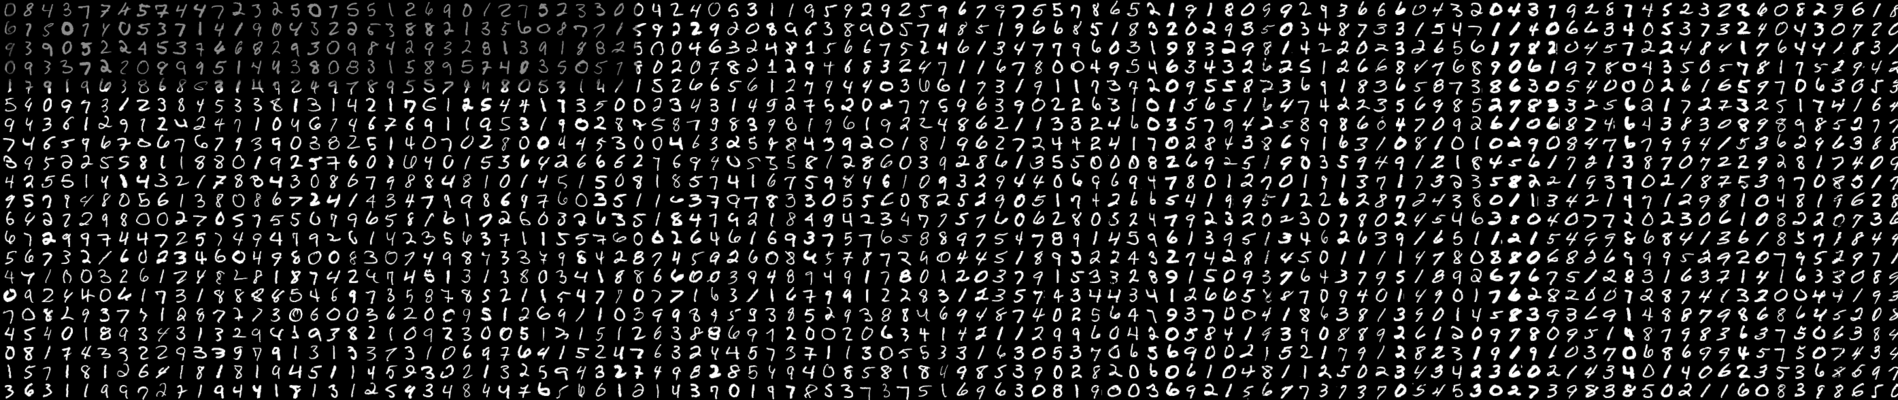

In this lab:
<br>
$\;\;\;\;\;\;$-Import the MNIST (Modified National Institute of Standards and Technology) set of handwritten digits
<br>
$\;\;\;\;\;\;$-Visualize our data
<br>
$\;\;\;\;\;\;$-Use the SKlearn library in Python to Create a training set and a testing set of the data
<br>
$\;\;\;\;\;\;$-Using Sklearn, Train a model to recognize handwritten digits
<br>
$\;\;\;\;\;\;$-Interpret and visualize the results
<br>
Prereqs:
<br>
$\;\;\;\;\;\;$-Data matrices and vectors
<br>
$\;\;\;\;\;\;$-Logistic Regression
<br>
$\;\;\;\;\;\;$-Training sets vs. Testing sets



In [2]:
#Our Libraries

from sklearn.datasets import fetch_openml             #This command from the Sklearn Library will help us access the dataset

from sklearn.model_selection import train_test_split  #For splitting the dataset into a training set and a testing set 

from sklearn.linear_model import LogisticRegression   #Our Logistic Regression Model

from sklearn import metrics                           #Some helpful tools for understanding our results          

import numpy as np                                    #Numpy is always helpful!

import matplotlib.pyplot as plt                       #A popular graphing library for visualization



# Part 1: Loading the MNIST Dataset 

In [3]:
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Ok, we've loaded our data. But what do we actually have?

In [4]:
print(mnist.data)

#Hmmm, what exactly is going on here?

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [6]:
print("This data set is really a matrix with " + str(mnist.data.shape[0]) + " rows, and " + str(mnist.data.shape[1]) + ' columns!')

This data set is really a matrix with 70000 rows, and 784 columns!


### Each row is a vectorized handwritten number. The first number is a 5, based on the target data. Lets take a closer look at the data for this single digit:

In [7]:
digit = 0
mnist.data[digit]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### This doesn't look like a number yet, Lets "Reshape" it, into the original square that the digit was

In [8]:
testimage = np.reshape(mnist.data[digit], (28, 28))
print(testimage)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

### Hmm, still a little hard to see whats going on. Instead of looking at this array, let's print the first 5 numbers :

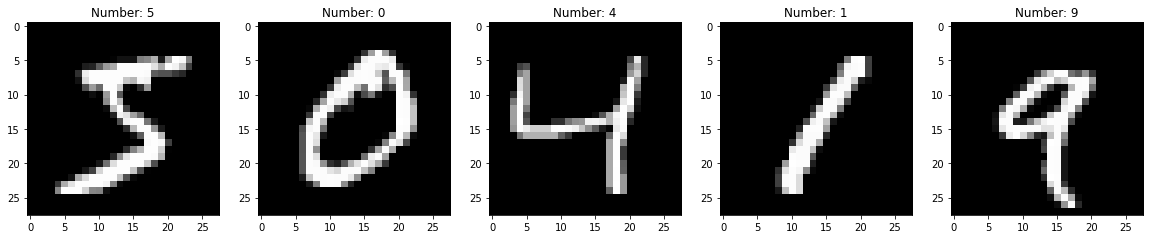

In [9]:
plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap = 'gray')
    plt.title('Number: %s' % label)

### Now these look handwritten to me!

# Part 2: Training Our Model 

### Remember how we train the model on different data than we test it on? Sklearn makes this super easy... 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size = 0.2)

### ...Speaking of easy, watch how easy Sklearn makes it to train our model (this could take a little while):

In [11]:
#The next two lines of code train a model, using our training data
mdl = LogisticRegression(solver = 'lbfgs')
mdl.fit(X_train, Y_train)

#The next two lines create predictions from our test data, so we can see how well we did
predictions = mdl.predict(X_test)

C:\Users\mchuf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### You may get an error "STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT". That's ok! The program wants you to know that  you maxed out on iterations before converging to a solution. In theory, we could improve our accuracy by increasing iterations. For now, these results are good enough.

# Part 3: Understanding our results

### Lets look at the model score. What does this mean? Do you think this is a good model? 

In [12]:
TestScore = mdl.score(X_test, Y_test)
print(TestScore)

0.9200714285714285


In [13]:
TrainingScore = mdl.score(X_train, Y_train)
print(TrainingScore)

0.9351607142857142


### Run the next cell to visualize a single digit from our test set. Compare it to the model prediction:

Our model predicts: 2


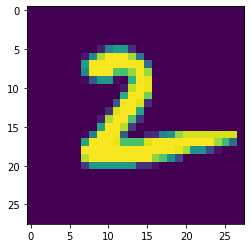

In [13]:
index = 5
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Our model predicts: " + mdl.predict([X_test[index]])[0])

### Change the "index" value above, and look at a few numbers. Can you find one where the prediction doesn't match the picture? 

# Part 4: Visualizing Our Results

### As we discussed, we can use a Confusion Matrix to Visualize our results. Sklearn makes it very easy to generate this: 

In [101]:
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[1302    0    3    2    6   11    7    3   11    0]
 [   0 1523    9    3    0    3    0    1   20    1]
 [   6   14 1271   27   12   12   16   15   32    6]
 [   6    6   32 1263    1   47    4   15   21   11]
 [   4    6   11    3 1297    0   10    4   13   46]
 [  19    5   14   43   10 1083   24    5   42   13]
 [   4    4   19    1    8   26 1329    4    7    0]
 [   4    3   17    6    7    1    0 1374    6   47]
 [   7   24   15   33    3   38   10    3 1231   16]
 [   6    4    3   15   24    8    0   44   15 1260]]


### Ok, but its a little tough to get a sense of what's happening with this box of numbers. Lets graph our Confusion Matrix instead: 

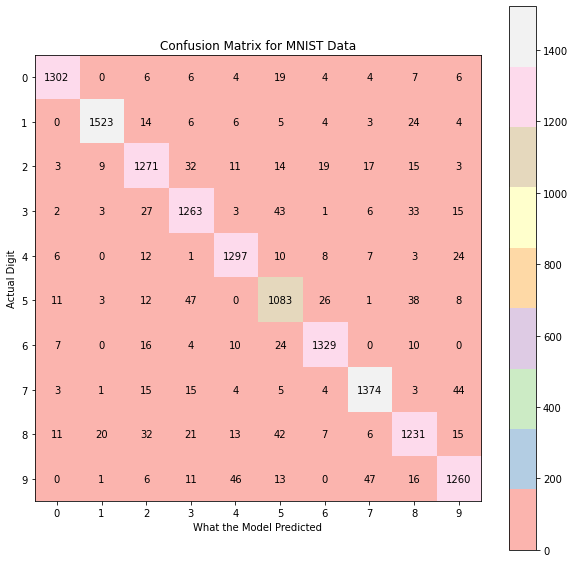

In [79]:

#This looks complicated, but its just directions for the graph below. No worries if it doesn't make sense right now!
plt.figure(figsize = (10,10))
plt.imshow(cm, cmap = 'Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel("Actual Digit")
plt.xlabel('What the Model Predicted')

plt.colorbar()


width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')
        

### From the Confusion Matrix above, what gave our model the most trouble when it was asked to classify the digit "4"? Does this make sense?